In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
from bfunc import bfunc00,bfunc01,bfunc02



In [3]:
reg = 'Car'
line = 'CarR'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

50.18670390511795

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
dlog=-0.15

In [8]:
table = sosflog(data,dlog)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
table

s                                                              \
       count      mean       std       min       25%       50%       75%   
ils                                                                        
0    79632.0  8.822079  1.411036  7.079512  7.734754  8.492168  9.564552   
1    86831.0  5.978455  0.591909  5.011954  5.461078  5.950229  6.473471   
2    77214.0  4.271865  0.421765  3.548183  3.906396  4.267581  4.635338   
3    52129.0  3.043270  0.295874  2.511887  2.790511  3.049301  3.296650   
4    30960.0  2.154455  0.211257  1.778300  1.973531  2.153584  2.338684   
5    18001.0  1.530209  0.150499  1.258994  1.401459  1.536238  1.662842   
6     9492.0  1.082344  0.105465  0.891412  0.993006  1.086119  1.173982   
7     5078.0  0.767613  0.073971  0.630986  0.707276  0.770630  0.833140   
8     2709.0  0.545503  0.052532  0.446690  0.500807  0.547953  0.591773   
9     1428.0  0.383780  0.039517  0.316555  0.348172  0.385730  0.418820   
10     735.0  0.273898  0.027120  0.223978  0.251760  0.276707  0.298185   
11     314.0  0.191810  0.020269  0.158874  0.171456  0.191680  0.211666   
12     152.0  0.137136  0.013903  0.112960  0.124210  0.139348  0.148269   
13      82.0  0.096325  0.010509  0.080596  0.084982  0.098314  0.105083   
14      37.0  0.070683  0.006943  0.056542  0.066775  0.072971  0.075354   
15      16.0  0.047470  0.003233  0.042258  0.046470  0.048143  0.048227   
16       4.0  0.036452  0.003104  0.033659  0.033849  0.036283  0.038887   
17       6.0  0.024623  0.002828  0.021383  0.022233  0.024784  0.026972   
22       1.0  0.003864       NaN  0.003864  0.003864  0.003864  0.003864   
24       1.0  0.002450       NaN  0.002450  0.002450  0.002450  0.002450   

                    dV2                                                      \
           max    count        mean         std     min        25%      50%   
ils                                                                           
0    17.667695  79632.0  102.145712  128.914668  0.0000  11.492100  52.8529   
1     7.079349  86831.0   96.343176  142.224297  0.0000   8.122500  40.4496   
2     5.011859  77214.0  117.413647  158.102154  0.0000  13.764100  57.3049   
3     3.548012  52129.0  107.427918  159.917144  0.0000  10.758400  48.0249   
4     2.511863  30960.0   90.809279  149.643694  0.0000   5.904900  32.3761   
5     1.778212  18001.0   80.967124  158.331566  0.0000   3.610000  20.9764   
6     1.258847   9492.0   70.106625  155.030702  0.0000   2.624400  14.5924   
7     0.891203   5078.0   58.816495  149.126323  0.0000   1.883775  10.6276   
8     0.630448   2709.0   49.149333  125.511137  0.0000   1.822500   9.1204   
9     0.446639   1428.0   41.678792  138.367100  0.0000   0.921600   4.6656   
10    0.315879    735.0   35.060818  130.599142  0.0000   0.792100   3.6100   
11    0.223817    314.0   29.879809  120.607898  0.0001   0.400075   2.6897   
12    0.158369    152.0   17.035527   79.761645  0.0001   0.490000   2.1025   
13    0.111860     82.0   18.029163   84.866171  0.0001   0.493525   1.7425   
14    0.079394     37.0  111.325732  310.730701  0.0225   0.324900   3.6100   
15    0.053792     16.0   23.197813   50.327844  0.0529   0.441700   1.3505   
16    0.039583      4.0    0.317750    0.250035  0.0529   0.216025   0.2810   
17    0.027701      6.0    1.154850    1.539918  0.2209   0.238575   0.3258   
22    0.003864      1.0    0.022500         NaN  0.0225   0.022500   0.0225   
24    0.002450      1.0    1.123600         NaN  1.1236   1.123600   1.1236   

                            
            75%        max  
ils                         
0    145.443600  1706.5161  
1    117.722500  1816.4644  
2    153.264400  2127.9769  
3    131.790400  1955.4084  
4    105.678400  2274.3361  
5     79.210000  1941.2836  
6     57.002500  1975.8025  
7     38.533075  1635.3936  
8     33.988900  1748.0761  
9     19.448100  1255.2849  
10    14.326250  1480.7104  
11    11.056300  1560.2500  
12     8.

In [10]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [11]:
r0 = np.interp(sig2, b2, s,period = 360)
r0

0.562447857169308

In [12]:
r1 = np.interp(sig, b2, s,period = 360)
r1

0.06603201302099643

In [13]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

10.440818324724539

In [14]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [22]:
m = 1.0

In [16]:
rgrid = np.logspace(-2, 1)

(50.18670390511795, 0.562447857169308, 1.0)

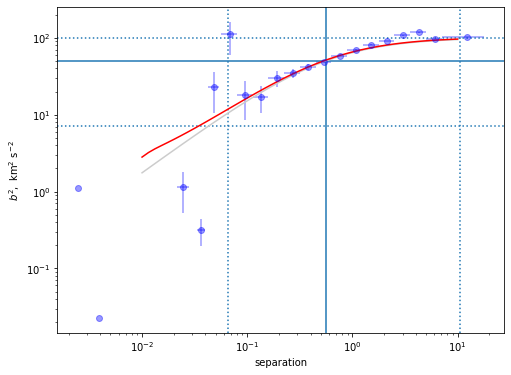

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, VF['s0'], b2.mean()*0.025), color="red")

ax.set(xscale='log', yscale='log', 
       xlabel='separation',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m

In [18]:
table

s                                                              \
       count      mean       std       min       25%       50%       75%   
ils                                                                        
0    79632.0  8.822079  1.411036  7.079512  7.734754  8.492168  9.564552   
1    86831.0  5.978455  0.591909  5.011954  5.461078  5.950229  6.473471   
2    77214.0  4.271865  0.421765  3.548183  3.906396  4.267581  4.635338   
3    52129.0  3.043270  0.295874  2.511887  2.790511  3.049301  3.296650   
4    30960.0  2.154455  0.211257  1.778300  1.973531  2.153584  2.338684   
5    18001.0  1.530209  0.150499  1.258994  1.401459  1.536238  1.662842   
6     9492.0  1.082344  0.105465  0.891412  0.993006  1.086119  1.173982   
7     5078.0  0.767613  0.073971  0.630986  0.707276  0.770630  0.833140   
8     2709.0  0.545503  0.052532  0.446690  0.500807  0.547953  0.591773   
9     1428.0  0.383780  0.039517  0.316555  0.348172  0.385730  0.418820   
10     735.0  0.273898  0.027120  0.223978  0.251760  0.276707  0.298185   
11     314.0  0.191810  0.020269  0.158874  0.171456  0.191680  0.211666   
12     152.0  0.137136  0.013903  0.112960  0.124210  0.139348  0.148269   
13      82.0  0.096325  0.010509  0.080596  0.084982  0.098314  0.105083   
14      37.0  0.070683  0.006943  0.056542  0.066775  0.072971  0.075354   
15      16.0  0.047470  0.003233  0.042258  0.046470  0.048143  0.048227   
16       4.0  0.036452  0.003104  0.033659  0.033849  0.036283  0.038887   
17       6.0  0.024623  0.002828  0.021383  0.022233  0.024784  0.026972   
22       1.0  0.003864       NaN  0.003864  0.003864  0.003864  0.003864   
24       1.0  0.002450       NaN  0.002450  0.002450  0.002450  0.002450   

                    dV2                                                      \
           max    count        mean         std     min        25%      50%   
ils                                                                           
0    17.667695  79632.0  102.145712  128.914668  0.0000  11.492100  52.8529   
1     7.079349  86831.0   96.343176  142.224297  0.0000   8.122500  40.4496   
2     5.011859  77214.0  117.413647  158.102154  0.0000  13.764100  57.3049   
3     3.548012  52129.0  107.427918  159.917144  0.0000  10.758400  48.0249   
4     2.511863  30960.0   90.809279  149.643694  0.0000   5.904900  32.3761   
5     1.778212  18001.0   80.967124  158.331566  0.0000   3.610000  20.9764   
6     1.258847   9492.0   70.106625  155.030702  0.0000   2.624400  14.5924   
7     0.891203   5078.0   58.816495  149.126323  0.0000   1.883775  10.6276   
8     0.630448   2709.0   49.149333  125.511137  0.0000   1.822500   9.1204   
9     0.446639   1428.0   41.678792  138.367100  0.0000   0.921600   4.6656   
10    0.315879    735.0   35.060818  130.599142  0.0000   0.792100   3.6100   
11    0.223817    314.0   29.879809  120.607898  0.0001   0.400075   2.6897   
12    0.158369    152.0   17.035527   79.761645  0.0001   0.490000   2.1025   
13    0.111860     82.0   18.029163   84.866171  0.0001   0.493525   1.7425   
14    0.079394     37.0  111.325732  310.730701  0.0225   0.324900   3.6100   
15    0.053792     16.0   23.197813   50.327844  0.0529   0.441700   1.3505   
16    0.039583      4.0    0.317750    0.250035  0.0529   0.216025   0.2810   
17    0.027701      6.0    1.154850    1.539918  0.2209   0.238575   0.3258   
22    0.003864      1.0    0.022500         NaN  0.0225   0.022500   0.0225   
24    0.002450      1.0    1.123600         NaN  1.1236   1.123600   1.1236   

                            
            75%        max  
ils                         
0    145.443600  1706.5161  
1    117.722500  1816.4644  
2    153.264400  2127.9769  
3    131.790400  1955.4084  
4    105.678400  2274.3361  
5     79.210000  1941.2836  
6     57.002500  1975.8025  
7     38.533075  1635.3936  
8     33.988900  1748.0761  
9     19.448100  1255.2849  
10    14.326250  1480.7104  
11    11.056300  1560.2500  
12     8.

In [24]:
Car = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m}

In [25]:
f = open('SFresults\\'+ line + '.pkl',"wb")
pickle.dump(Car,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [26]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 699.8532886505127 seconds ---
